# Step 1: Installing and Importing Packages

In [1]:
# pydeseq2 is the Python equivalent of DESeq2 which is initially used in R 
# this package is used to conduct differential gene expression (DGE) analyses on bulk RNA-seq datasets

%pip install pydeseq2

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

import pandas as pd

# Step 2: Loading & Exploring Dataset + Editing Dataframe 

In [3]:
# The dataset is composed of raw read counts from a RNA-seq using Next Generation Sequencing (NGS)
# The RNA-seq was done on the larval stage of Nematostella vectensis (Starlet sea anemone)
# Larvae were microdissected into 2 parts - the 'head' region, called the apical organ (AO) and body (B)
# Around 100 specimens were used for 1 replicate (e.g., 100 specimens for AO1)


genes=pd.read_csv(r"C:\Users\imran\OneDrive\Desktop\NVE1.csv", encoding='latin1')
print(genes)

       Gene ID  AO1  AO2   B1   B2
0        NVE93   79   65   86   71
1       NVE253  123  135  560  501
2        NVE13    3    2    5    7
3        NVE22   28   26   34   19
4        NVE38  816  677  837  695
...        ...  ...  ...  ...  ...
25724  NVE7325   25    9   12   12
25725  NVE7335    0    0    2    0
25726  NVE7382  103   92   71   59
25727  NVE7385    0    0    0    0
25728  NVE7394    2    1    3    2

[25729 rows x 5 columns]


In [4]:
# Assigned 'Gene ID' as the index for the dataframe 

genes = genes.set_index('Gene ID')
genes

,AO1,AO2,B1,B2
Gene ID,,,,
NVE93,79,65,86,71
NVE253,123,135,560,501
NVE13,3,2,5,7
NVE22,28,26,34,19
NVE38,816,677,837,695
...,...,...,...,...
NVE7325,25,9,12,12
NVE7335,0,0,2,0
NVE7382,103,92,71,59


In [5]:
# Eliminating rows that have '0' as values in all columns

genes = genes[genes.sum(axis = 1) > 0]
genes

,AO1,AO2,B1,B2
Gene ID,,,,
NVE93,79,65,86,71
NVE253,123,135,560,501
NVE13,3,2,5,7
NVE22,28,26,34,19
NVE38,816,677,837,695
...,...,...,...,...
NVE7240,13,15,18,16
NVE7325,25,9,12,12
NVE7335,0,0,2,0


In [6]:
# Transposed the dataframe for downstream analyses 

genes = genes.T

In [7]:
genes

Gene ID,NVE93,NVE253,NVE13,NVE22,NVE38,NVE44,NVE61,NVE106,NVE126,NVE131,...,NVE7181,NVE7183,NVE7188,NVE7190,NVE7193,NVE7240,NVE7325,NVE7335,NVE7382,NVE7394
AO1,79,123,3,28,816,641,89,291,320,193,...,3,0,0,7,1,13,25,0,103,2
AO2,65,135,2,26,677,489,91,272,278,171,...,1,1,1,7,1,15,9,0,92,1
B1,86,560,5,34,837,630,119,308,322,214,...,1,0,0,5,0,18,12,2,71,3
B2,71,501,7,19,695,482,64,256,265,169,...,0,1,2,4,0,16,12,0,59,2


# Step 3: Preparing the Metadata

In [8]:
# Created metadata because dataset has no existing metadata 
# Besides the 'count' data, metadata is also required to perform a DGE
# Metadata contains samples of annotations that are used to seperate the data into different groups 


metadata = pd.DataFrame(zip(genes.index, ['Apical','Apical','Body','Body']),
                        columns = ['Sample', 'Conditions'])

In [9]:
metadata

,Sample,Conditions
0,AO1,Apical
1,AO2,Apical
2,B1,Body
3,B2,Body


In [10]:
# Set the 'Sample' column as index
# Sample table is ready for DGE analyses

metadata = metadata.set_index('Sample')
metadata

,Conditions
Sample,
AO1,Apical
AO2,Apical
B1,Body
B2,Body


# Step 4: Performing Differential Gene Expression (DGE) Analyses

In [11]:
# Assigned the DeseqDataSet function as dds
# 'design_factors' = the 'formula' for the differential expression; 'Conditions' is the only variable in the dataframe 

dds = DeseqDataSet(counts=genes,
            metadata=metadata,
            design_factors="Conditions")

In [12]:
dds

AnnData object with n_obs × n_vars = 4 × 24901
    obs: 'Conditions'
    obsm: 'design_matrix'

In [13]:
# Executed deseq2 package for DGE analyses

dds.deseq2()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 2.48 seconds.

Fitting dispersion trend curve...
... done in 0.56 seconds.

C:\Users\imran\anaconda3\Lib\site-packages\pydeseq2\dds.py:425: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 2.66 seconds.

Fitting LFCs...
... done in 2.17 seconds.

Refitting 0 outliers.



In [14]:
# Now, the 'dds' object has had various statistical analyses implemented on it 

dds

AnnData object with n_obs × n_vars = 4 × 24901
    obs: 'Conditions'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [15]:
# This line of code is used to specify the genes that have been differentially expressed 
# The 'contrast' function is to specify which variables that need to be analysed. In this case, we are 'comparing' the genes expressed between the apical region and body, both of which are under the 'Conditions' column

stat_res = DeseqStats(dds, contrast = ('Conditions','Apical','Body'))

In [16]:
# This function is to actually calculate the statistics and identify the genes that have been differentially expressed 

stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Conditions Apical vs Body
           baseMean  log2FoldChange     lfcSE       stat        pvalue  \
Gene ID                                                                  
NVE93     74.470284       -0.051123  0.309615  -0.165117  8.688520e-01   
NVE253   322.891733       -1.964516  0.181644 -10.815205  2.916388e-27   
NVE13      4.222620       -1.215474  1.285184  -0.945759  3.442715e-01   
NVE22     26.349262        0.118562  0.514832   0.230293  8.178640e-01   
NVE38    749.141683        0.036067  0.129848   0.277760  7.811968e-01   
...             ...             ...       ...        ...           ...   
NVE7240   15.394824       -0.202478  0.658669  -0.307405  7.585353e-01   
NVE7325   14.333723        0.550727  0.721083   0.763750  4.450160e-01   
NVE7335    0.447415       -2.271508  4.494800  -0.505364  6.133035e-01   
NVE7382   80.999259        0.659928  0.298989   2.207202  2.729993e-02   
NVE7394    1.950906       -0.663230  1.818856  -

... done in 1.44 seconds.



In [17]:
# Called the results of all the statistical tests done above 
# Differential gene expression analyses is complete 

res = stat_res.results_df

In [18]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene ID,,,,,,
NVE93,74.470284,-0.051123,0.309615,-0.165117,8.688520e-01,9.598048e-01
NVE253,322.891733,-1.964516,0.181644,-10.815205,2.916388e-27,3.776816e-25
NVE13,4.222620,-1.215474,1.285184,-0.945759,3.442715e-01,NaN
NVE22,26.349262,0.118562,0.514832,0.230293,8.178640e-01,9.435049e-01
NVE38,749.141683,0.036067,0.129848,0.277760,7.811968e-01,9.326475e-01
...,...,...,...,...,...,...
NVE7240,15.394824,-0.202478,0.658669,-0.307405,7.585353e-01,9.231374e-01
NVE7325,14.333723,0.550727,0.721083,0.763750,4.450160e-01,7.498368e-01
NVE7335,0.447415,-2.271508,4.494800,-0.505364,6.133035e-01,NaN


# Step 5: Filtering and Cleaning New Dataframe

In [19]:
# This step is to remove any genes that are lowly expressed

res = res[res.baseMean >= 10]

In [20]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene ID,,,,,,
NVE93,74.470284,-0.051123,0.309615,-0.165117,8.688520e-01,9.598048e-01
NVE253,322.891733,-1.964516,0.181644,-10.815205,2.916388e-27,3.776816e-25
NVE22,26.349262,0.118562,0.514832,0.230293,8.178640e-01,9.435049e-01
NVE38,749.141683,0.036067,0.129848,0.277760,7.811968e-01,9.326475e-01
NVE44,554.132513,0.098205,0.150394,0.652986,5.137652e-01,7.980197e-01
...,...,...,...,...,...,...
NVE7046,18.507988,0.038532,0.602024,0.064004,9.489669e-01,9.861572e-01
NVE7098,39.888328,0.047011,0.421271,0.111594,9.111457e-01,9.746582e-01
NVE7240,15.394824,-0.202478,0.658669,-0.307405,7.585353e-01,9.231374e-01


In [21]:
# Further filtering to eliminate low and insignificantly expressed genes 

sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]

In [22]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene ID,,,,,,
NVE253,322.891733,-1.964516,0.181644,-10.815205,2.916388e-27,3.776816e-25
NVE7,204.569138,0.709945,0.206821,3.432657,5.976969e-04,5.588062e-03
NVE15,63.506338,-4.427488,0.536044,-8.259560,1.462108e-16,9.566839e-15
NVE18,1301.435482,0.729114,0.138628,5.259509,1.444406e-07,3.172162e-06
NVE19,793.150829,0.786371,0.130457,6.027796,1.662103e-09,5.117083e-08
...,...,...,...,...,...,...
NVE1825,401.734227,2.448880,0.176371,13.884790,7.832972e-44,2.153853e-41
NVE1893,69.971506,-1.911779,0.379343,-5.039714,4.662290e-07,9.427816e-06
NVE1895,59.005603,-1.599147,0.382242,-4.183603,2.869250e-05,3.839631e-04


# Step 6: Visualising Differentially Expressed Genes 

In [23]:
# Scanpy package was loaded to perform Principal Component Analysis (PCA)

import scanpy as sc

In [24]:
dds

AnnData object with n_obs × n_vars = 4 × 24901
    obs: 'Conditions'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [25]:
# A PCA was done on the genes that are differentially expressed 

sc.tl.pca(dds)

C:\Users\imran\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


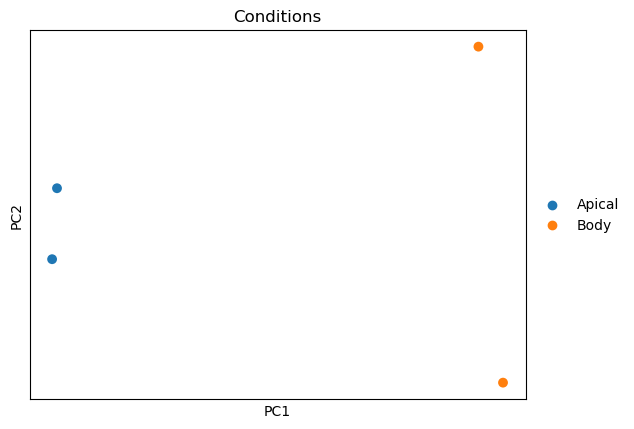

In [70]:
# Plotted PCA

plot1 = sc.pl.pca(dds, color = 'Conditions', size = 200)


In [27]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene ID,,,,,,
NVE93,74.470284,-0.051123,0.309615,-0.165117,8.688520e-01,9.598048e-01
NVE253,322.891733,-1.964516,0.181644,-10.815205,2.916388e-27,3.776816e-25
NVE22,26.349262,0.118562,0.514832,0.230293,8.178640e-01,9.435049e-01
NVE38,749.141683,0.036067,0.129848,0.277760,7.811968e-01,9.326475e-01
NVE44,554.132513,0.098205,0.150394,0.652986,5.137652e-01,7.980197e-01
...,...,...,...,...,...,...
NVE7046,18.507988,0.038532,0.602024,0.064004,9.489669e-01,9.861572e-01
NVE7098,39.888328,0.047011,0.421271,0.111594,9.111457e-01,9.746582e-01
NVE7240,15.394824,-0.202478,0.658669,-0.307405,7.585353e-01,9.231374e-01


In [28]:
# Rearranging the dataframe to be how it originally was

df = genes.T

In [29]:
df

,AO1,AO2,B1,B2
Gene ID,,,,
NVE93,79,65,86,71
NVE253,123,135,560,501
NVE13,3,2,5,7
NVE22,28,26,34,19
NVE38,816,677,837,695
...,...,...,...,...
NVE7240,13,15,18,16
NVE7325,25,9,12,12
NVE7335,0,0,2,0


In [30]:
# Imported bioinfokit to create visualisation tools for differentially expressed genes 

from bioinfokit import analys, visuz

In [31]:
# For the purpose of this assignment, only a small fraction of the whole dataset was sampled to create a 'heatmap'
# An error would occur if the whole dataset was used - dataset is too big! 

df1 = df.sample(n=100,replace=True)

In [32]:
df1

,AO1,AO2,B1,B2
Gene ID,,,,
NVE22757,1163,959,698,579
NVE3271,175,116,216,189
NVE23147,1759,1680,1956,1667
NVE23766,143,117,160,139
NVE12013,0,1,0,0
...,...,...,...,...
NVE8360,118,130,255,270
NVE19804,365,354,371,299
NVE20645,38,35,46,29


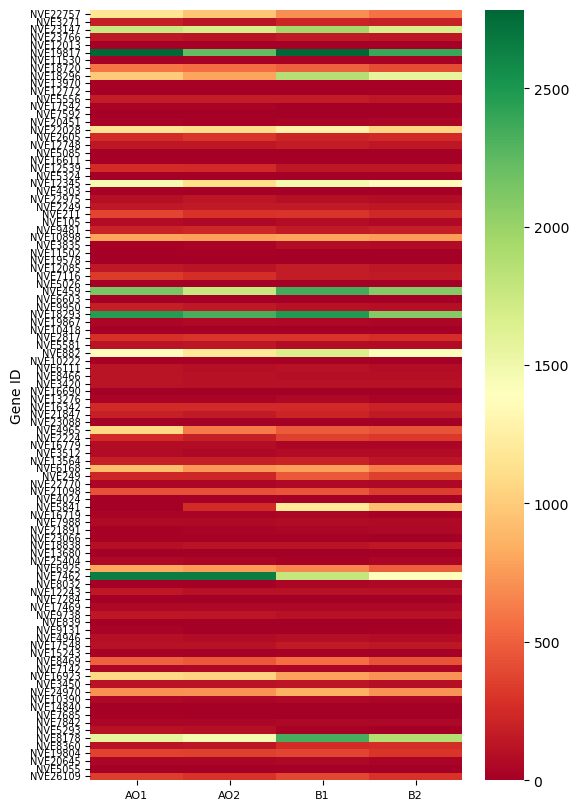

In [33]:
# A heatmap was created 
# A heatmap is used to signify specific sets of values using a colourmap 
# It is often used in DGE analyses to highlight changes in gene expression which are statistically significant that occur among thousands of conditions. In this case, it shows the difference between genes expressed in the apical region and body


visuz.gene_exp.hmap(df=df1, dim=(6, 10), rowclus=False, colclus=False, tickfont=(8, 7),zscore=1, cmap='RdYlGn',show=True)

In [34]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene ID,,,,,,
NVE93,74.470284,-0.051123,0.309615,-0.165117,8.688520e-01,9.598048e-01
NVE253,322.891733,-1.964516,0.181644,-10.815205,2.916388e-27,3.776816e-25
NVE22,26.349262,0.118562,0.514832,0.230293,8.178640e-01,9.435049e-01
NVE38,749.141683,0.036067,0.129848,0.277760,7.811968e-01,9.326475e-01
NVE44,554.132513,0.098205,0.150394,0.652986,5.137652e-01,7.980197e-01
...,...,...,...,...,...,...
NVE7046,18.507988,0.038532,0.602024,0.064004,9.489669e-01,9.861572e-01
NVE7098,39.888328,0.047011,0.421271,0.111594,9.111457e-01,9.746582e-01
NVE7240,15.394824,-0.202478,0.658669,-0.307405,7.585353e-01,9.231374e-01


In [35]:
# Created yet another, dataframe by combining the original dataset with the results of the DeseqStats
# The data from both dataframes will be used to create the Volcano and MA plots 

new_table = pd.concat([res, df], axis=1, join='inner')
display(new_table)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,AO1,AO2,B1,B2
Gene ID,,,,,,,,,,
NVE93,74.470284,-0.051123,0.309615,-0.165117,8.688520e-01,9.598048e-01,79,65,86,71
NVE253,322.891733,-1.964516,0.181644,-10.815205,2.916388e-27,3.776816e-25,123,135,560,501
NVE22,26.349262,0.118562,0.514832,0.230293,8.178640e-01,9.435049e-01,28,26,34,19
NVE38,749.141683,0.036067,0.129848,0.277760,7.811968e-01,9.326475e-01,816,677,837,695
NVE44,554.132513,0.098205,0.150394,0.652986,5.137652e-01,7.980197e-01,641,489,630,482
...,...,...,...,...,...,...,...,...,...,...
NVE7046,18.507988,0.038532,0.602024,0.064004,9.489669e-01,9.861572e-01,21,16,22,16
NVE7098,39.888328,0.047011,0.421271,0.111594,9.111457e-01,9.746582e-01,45,35,50,32
NVE7240,15.394824,-0.202478,0.658669,-0.307405,7.585353e-01,9.231374e-01,13,15,18,16


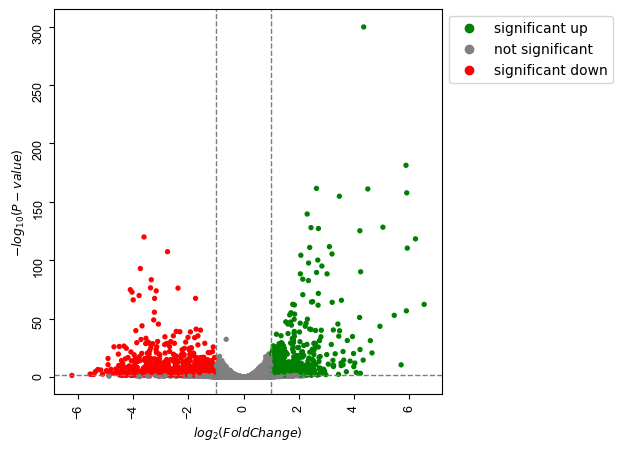

In [71]:
# A Volcano plot is essentally a scatter plot with the shape of a volcano 
# This plot is often used in DEG analyses to highlight and identify statistically significant changes in gene expression from 2 different conditions
# Points that more widely distributed signify a higher significant change in gene expression (e.g., the higher the point is on the y-axis, the smaller its p value)

visuz.GeneExpression.volcano(df=new_table, lfc='log2FoldChange', pv='padj', show=True, plotlegend=True, legendpos='upper right', 
    legendanchor=(1.46,1), sign_line=True)

In [37]:
new_table

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,AO1,AO2,B1,B2
Gene ID,,,,,,,,,,
NVE93,74.470284,-0.051123,0.309615,-0.165117,8.688520e-01,9.598048e-01,79,65,86,71
NVE253,322.891733,-1.964516,0.181644,-10.815205,2.916388e-27,3.776816e-25,123,135,560,501
NVE22,26.349262,0.118562,0.514832,0.230293,8.178640e-01,9.435049e-01,28,26,34,19
NVE38,749.141683,0.036067,0.129848,0.277760,7.811968e-01,9.326475e-01,816,677,837,695
NVE44,554.132513,0.098205,0.150394,0.652986,5.137652e-01,7.980197e-01,641,489,630,482
...,...,...,...,...,...,...,...,...,...,...
NVE7046,18.507988,0.038532,0.602024,0.064004,9.489669e-01,9.861572e-01,21,16,22,16
NVE7098,39.888328,0.047011,0.421271,0.111594,9.111457e-01,9.746582e-01,45,35,50,32
NVE7240,15.394824,-0.202478,0.658669,-0.307405,7.585353e-01,9.231374e-01,13,15,18,16


C:\Users\imran\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
<__array_function__ internals>:200: UserWarning: Warning: converting a masked element to nan.
C:\Users\imran\anaconda3\Lib\site-packages\matplotlib\colors.py:1311: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
C:\Users\imran\anaconda3\Lib\site-packages\matplotlib\ticker.py:521: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


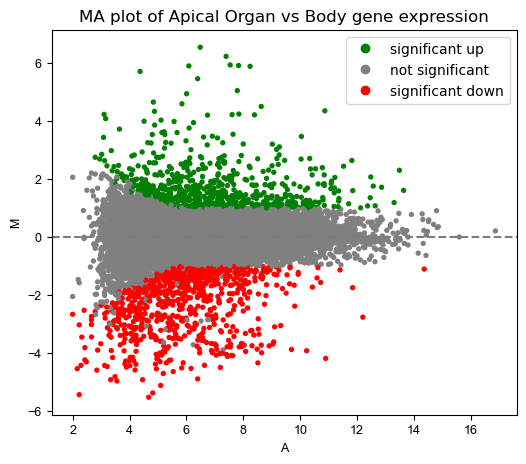

In [58]:
# MA plots are also another common visualisation tool for DGE analyses 
# It is similar to a Volcano plot (shown above), where it shows and identifies gene expressions from different conditions (apical region vs body herein)
# Genes that have similar expression values in both variables will group around M=0. This means that these genes are expressed with insignificant differences between the variables
# Therefore, genes that are above M=0 are upregulated genes while the ones below it are downregulated 
# However, the MA plot does not take into account the statistics of the DEG analyses like the p-values or adjusted p-values. Thus, we are unable to identify which genes are statistically and significantly different between the variables. This is how the MA plot differs from the Volcano plot.  

visuz.GeneExpression.ma(df=new_table, lfc='log2FoldChange', ct_count='AO1', st_count='B1', pv='padj', show=True, plotlegend=True, title='MA plot of Apical Organ vs Body gene expression')

# Step 7: Delving Deeper into the Differentially Expressed Genes using BLAST 

## Importing and exploring dataset 

In [39]:
# Bio.SeqIO is a simple tool to work with assorted sequence file formats

from Bio import SeqIO

In [40]:
# Loading and specifying dataset

filename = r'C:\Users\imran\OneDrive\Desktop\nve.fa'

In [41]:
# Assigning dataset to 'sequences' argument 

sequences = [i for i in SeqIO.parse(filename, 'fasta')]

In [42]:
# Some data exploration 

len(sequences)

25729

In [43]:
# More data exploration 

sequence_a = sequences[0]
sequence_a.name

'NVE1'

In [44]:
# Created a an empty list to put in ID of gene of interest chosen from the DGE analyses above (heatmap: cell 33) 

gene_of_interest = []

In [45]:
# NVE23549 was chosen due to its high expression in the apical domain and body of Nematostella vectensis (heatmap: cell 33)

for sequence in sequences:
    if sequence.name == 'NVE235499':
        gene_of_interest.append(sequence)

In [46]:
# Simple data exploration of NVE23549 sequence

len(gene_of_interest)

0

In [47]:
for sequence in sequences:
    if sequence.name == 'NVE23549':
        gene_of_interest=sequence

In [48]:
# Assigned gene ID to name of gene_of_interest argument 

gene_of_interest.name

'NVE23549'

In [49]:
# Extracted NVE23549 sequence and saved it locally into an output file

SeqIO.write(gene_of_interest, r'C:\Users\imran\OneDrive\Desktop\nve23549.fa', 'fasta')

1

In [50]:
# Imported numpy to read gene sequence text file 
# Loaded in NVE23549 sequence 

import numpy as np

nve = nveprot = np.loadtxt(r"C:\Users\imran\OneDrive\Desktop\nve23549.fa", dtype="str", delimiter="\0")
nve

array(['>NVE23549',
       'MQRVHSRRSEASEAEMDGIAEQELAKLQRQYRIMEGDRRAYGEESQNVIKKQRDTIQWLQ',
       'KENEELMKDNRLAGSNQNQSKDNTNTSTLAELLDKEETYADEIDEVKTDINDLNAQIRVM',
       'EKKISQQRKNMGGVHMSHARHKQTKKHISVLENRLDQASKKFNASLAENWKLRERIDNQK',
       'VERSTFEARCKKLDNKIVEVKRQISEVIEASTAAYDARDEAQAKMLALKEKNDKDLAQYN',
       'TEFKELVRIIEHDRKLKEFMRVKGEERADMLEGELSSRKKKKDEKDKVDKADETIESYEA',
       'AFHKIKEATEIEDTDLLVNKFIEVEDRNFALFNYVNEQNNDIEKLQEEIAEAKADIEKFK',
       'SEGVEMEAERKAILKNKEEKLNAATEKGDQFDGQYKHTKKILEQLKTGIDSLFNKINCDR',
       'SAIENLLGSKEGITDNNMMQFLGIIEQRTNELLQVQAFQLTKDTEKEDPSPPVGLLGQGP',
       'QPGVVGVSIVPPSTGDDYDSDTSTGSDDDQRPMTQQELKNRIMKGITKREAHPKKTNHPS',
       'SATSDKATSRKKKAAK'], dtype='<U60')

# Step 8: Running a BLAST Search from NCBI Database

In [51]:
# NCBIWWW is used to 'call' the NCBI BLAST server via the internet 
# NCBIXML let's us work with the BLAST XML output

from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML


In [52]:
# Assigned a query using the sequence from gene_of_interest (NVE23549)

query_seq = 'MQRVHSRRSEASEAEMDGIAEQELAKLQRQYRIMEGDRRAYGEESQNVIKKQRDTIQWLQKENEELMKDNRLAGSNQNQSKDNTNTSTLAELLDKEETYADEIDEVKTDINDLNAQIRVMEKKISQQRKNMGGVHMSHARHKQTKKHISVLENRLDQASKKFNASLAENWKLRERIDNQKVERSTFEARCKKLDNKIVEVKRQISEVIEASTAAYDARDEAQAKMLALKEKNDKDLAQYNTEFKELVRIIEHDRKLKEFMRVKGEERADMLEGELSSRKKKKDEKDKVDKADETIESYEAAFHKIKEATEIEDTDLLVNKFIEVEDRNFALFNYVNEQNNDIEKLQEEIAEAKADIEKFKSEGVEMEAERKAILKNKEEKLNAATEKGDQFDGQYKHTKKILEQLKTGIDSLFNKINCDRSAIENLLGSKEGITDNNMMQFLGIIEQRTNELLQVQAFQLTKDTEKEDPSPPVGLLGQGPQPGVVGVSIVPPSTGDDYDSDTSTGSDDDQRPMTQQELKNRIMKGITKREAHPKKTNHPSSATSDKATSRKKKAAK'

In [53]:
# This line of code is the operational code to conduct the BLAST search 
# 'blastp' = telling NCBI to conduct a standard protein blast (protein to protein sequence search)
# 'nr' = specifies a protein database to search from 
# query_seq = telling the function what sequence to run on BLAST 

result_handle = NCBIWWW.qblast('blastp', 'nr', query_seq)

In [54]:
# The results of the BLAST search above is first parsed into the NCBIXML function 
# The NCBIXML function parses output from BLAST 

blast_record = NCBIXML.read(result_handle)

In [75]:
# This step prints out the results and their various data from the BLAST search from the NCBI website 
# The higher the results up the list, the more likely it is to be similar to the query sequence (Top Hit) 

for alignment in blast_record.alignments:

    for hsp in alignment.hsps:

        print(f"Alignment Sequence: {alignment.title}")

        print(f"Alignment Score: {hsp.score}")
        
        print(f'Length:{hsp.align_length}')
        
        print(f'Query:{hsp.query}')
        
        print(f'Subject:{hsp.sbjct}')
        
        print(' ')

Alignment Sequence: gb|EDO40983.1| predicted protein [Nematostella vectensis]
Alignment Score: 2938.0
Length:556
Query:MQRVHSRRSEASEAEMDGIAEQELAKLQRQYRIMEGDRRAYGEESQNVIKKQRDTIQWLQKENEELMKDNRLAGSNQNQSKDNTNTSTLAELLDKEETYADEIDEVKTDINDLNAQIRVMEKKISQQRKNMGGVHMSHARHKQTKKHISVLENRLDQASKKFNASLAENWKLRERIDNQKVERSTFEARCKKLDNKIVEVKRQISEVIEASTAAYDARDEAQAKMLALKEKNDKDLAQYNTEFKELVRIIEHDRKLKEFMRVKGEERADMLEGELSSRKKKKDEKDKVDKADETIESYEAAFHKIKEATEIEDTDLLVNKFIEVEDRNFALFNYVNEQNNDIEKLQEEIAEAKADIEKFKSEGVEMEAERKAILKNKEEKLNAATEKGDQFDGQYKHTKKILEQLKTGIDSLFNKINCDRSAIENLLGSKEGITDNNMMQFLGIIEQRTNELLQVQAFQLTKDTEKEDPSPPVGLLGQGPQPGVVGVSIVPPSTGDDYDSDTSTGSDDDQRPMTQQELKNRIMKGITKREAHPKKTNHPSSATSDKATSRKKKAAK
Subject:MQRVHSRRSEASEAEMDGIAEQELAKLQRQYRIMEGDRRAYGEESQNVIKKQRDTIQWLQKENEELMKDNRLAGSNQNQSKDNTNTSTLAELLDKEETYADEIDEVKTDINDLNAQIRVMEKKISQQRKNMGGVHMSHARHKQTKKHISVLENRLDQASKKFNASLAENWKLRERIDNQKVERSTFEARCKKLDNKIVEVKRQISEVIEASTAAYDARDEAQAKMLALKEKNDKDLAQYNTEFKELVRIIEHDRKLKEFMRVKGEERADMLEGELSSRKKKKDEKDKVDKADETIESYEAAFHKIKEATEIEDTDL

In [56]:
# Closed the BLAST function 

result_handle.close()

### From the BLAST results above, we can conclude that NVE23549 is almost definitely a coiled-coil domain-containing protein 63